#Image Segmentation


In [ ]:
#importing libraries
import numpy as np
import skimage.util 
import skimage
from skimage import filters
import cv2 as cv
from PIL import Image,ImageOps
from matplotlib.pyplot import imshow,title,figure
from matplotlib import pyplot as plt
import math
from scipy import ndimage, misc
import scipy
from skimage import io,color
from skimage.color import rgb2lab, lab2rgb
from skimage.filters import rank
from skimage.morphology import disk
from skimage.morphology import ball
%matplotlib inline

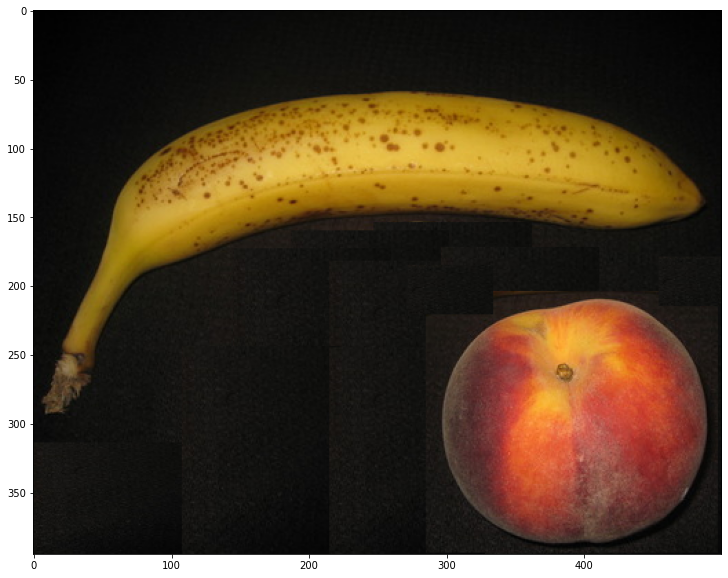

In [ ]:
#reading image
img = cv.imread('image_lab11.png')
img_rgb = img[:,:,::-1]

#displaying image
figure(figsize = (15,10))
imshow(img_rgb)

In [ ]:
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

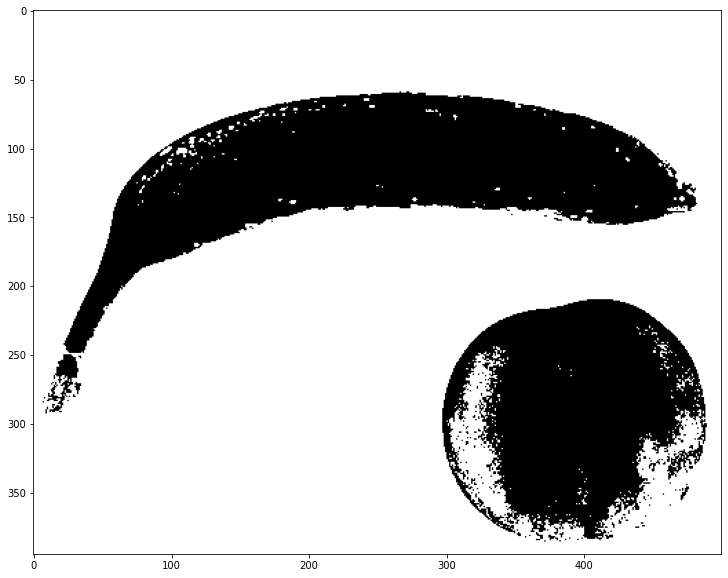

In [ ]:
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
figure(figsize = (15,10))
imshow(thresh,cmap='gray')

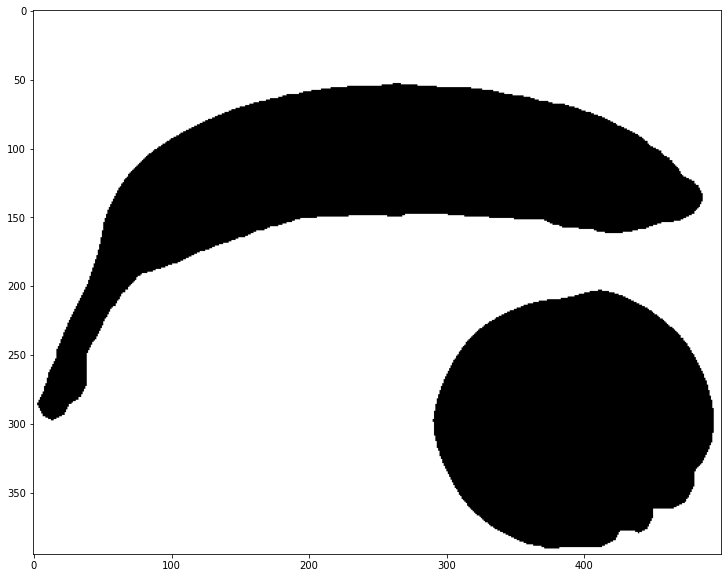

In [ ]:

kernelb = np.ones((5,5), np.uint8)

mask = disk(5)
maskb = disk(3)
img_erosion = cv.erode(thresh, maskb, iterations=3)
img_dilation = cv.dilate(img_erosion, kernelb, iterations=4)
img_erosion = cv.erode(img_dilation, maskb, iterations=2)

figure(figsize = (15,10))
imshow(img_erosion,cmap='gray')

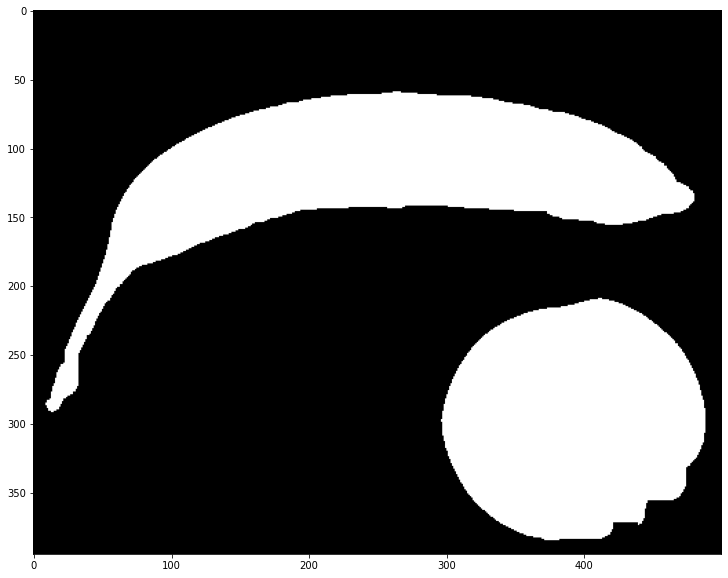

In [ ]:
imagem = cv.bitwise_not(img_dilation)
figure(figsize = (15,10))
imshow(imagem,cmap='gray')

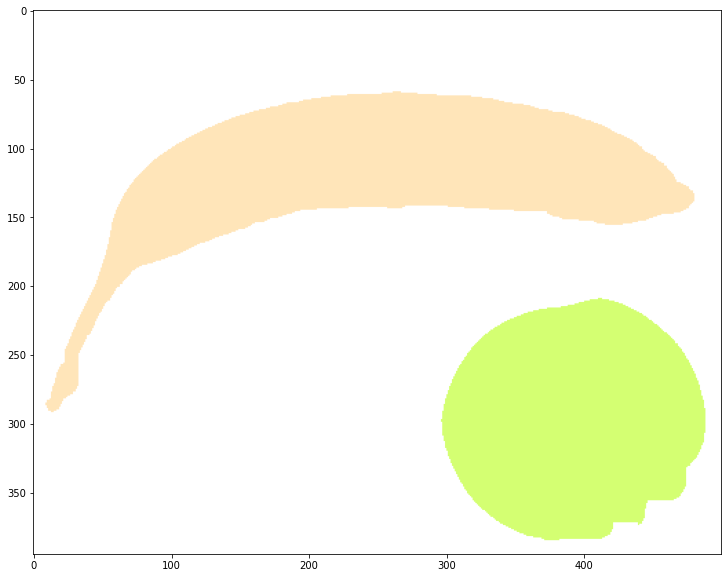

In [ ]:
num_labels, labels = cv.connectedComponents(imagem)
label_hue = np.uint8(39*labels/np.max(labels))
label_hue2 = np.uint8(140*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, label_hue2, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2RGB)
figure(figsize = (15,10))
imshow(labeled_img,cmap='gray')

which component u want to see?
white : 1
light orange : 2
lemon yellowish green : 3
2


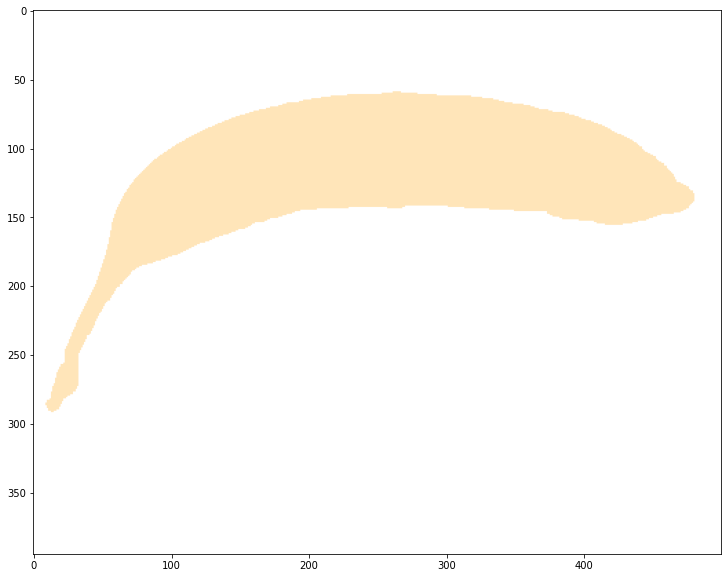

In [ ]:
print("which component u want to see?")
print("white : 1")
print("light orange : 2")
print("lemon yellowish green : 3")
inuser = int(input())
if inuser == 1:
  for i in range(labeled_img.shape[0]):
    for j in range(labeled_img.shape[1]):
      if ((labeled_img[i][j]==(255,255,255)).all()):
        continue
      labeled_img[i][j]=(255,255,255)


elif inuser == 2:
  for i in range(labeled_img.shape[0]):
    for j in range(labeled_img.shape[1]):
      if ((labeled_img[i][j]==(255,229,185)).all()):
        continue
      labeled_img[i][j]=(255,255,255)

elif inuser == 3:
  for i in range(labeled_img.shape[0]):
    for j in range(labeled_img.shape[1]):
      if ((labeled_img[i][j]==(212,255,114)).all()):
        continue
      labeled_img[i][j]=(255,255,255)

figure(figsize = (15,10))
imshow(labeled_img,cmap='gray')